# Correlation Analysis: Model Error vs. Feature Effect Error

<script>
    document.querySelector('head').innerHTML += '<style>.slides { zoom: 0.975 !important; }</style>';
</script>
<style>
/* Ensure the entire cell and its output take full width */
.reveal .slides > section .cell {
    width: 90% !important;
    margin: 0 auto;
}

.reveal .slides > section .output {
    width: 90% !important;
    max-width: 90% !important;
    height: 90% !important;
    max-height: 90% !important;
    margin: 0 auto;
}

/* Optional: Adjust the slide width if necessary */
.reveal .slides {
    width: 90% !important;
    max-width: 90% !important;
    height: 90% !important;
    max-height: 90% !important;
}


</style>

## Model Results

In [1]:
config_file = "../../config_sim_simple_scenarios_20.ini"

In [2]:
from configparser import ConfigParser
import pandas as pd

from feature_effect_empirical_analysis.plotting.utils import create_joined_melted_df
from feature_effect_empirical_analysis.plotting.plots import plot_correlation_analysis

In [3]:
config = ConfigParser()
config.read(config_file)

['../../config_sim_simple_scenarios_20.ini']

In [4]:
model_results_storage = config.get("storage", "model_results")
df_model_res = pd.read_sql_table("model_results", f"sqlite:///..{model_results_storage}")
df_model_res.head()

,index,model_id,model,simulation,n_train,snr,mse_train,mse_test,mae_train,mae_test,r2_train,r2_test
0,0,XGBoost-2comb-cor_1_1000_10,XGBoost-2comb-cor,1,1000,10.0,0.079481,0.179353,0.114556,0.249165,0.986319,0.965759
1,0,XGBoost-full_1_1000_10,XGBoost-full,1,1000,10.0,0.017879,0.182280,0.099350,0.266170,0.996923,0.965200
2,0,SVM-RBF_1_1000_10,SVM-RBF,1,1000,10.0,0.048364,0.054282,0.174470,0.185616,0.991675,0.989637
3,0,GAM-2comb-cor_1_1000_10,GAM-2comb-cor,1,1000,10.0,0.048879,0.052544,0.175903,0.183005,0.991587,0.989969
4,0,GAM-4-full_1_1000_10,GAM-4-full,1,1000,10.0,0.044333,0.056250,0.167913,0.189171,0.992369,0.989261


## Feature Effect Results

In [5]:
feauture_effect_type = "pdp_results"

In [6]:
effects_results_storage = config.get("storage", "effects_results")
df_effect_res = pd.read_sql_table(feauture_effect_type, f"sqlite:///..{effects_results_storage}")
df_effect_res.head()

,index,model_id,model,simulation,n_train,snr,metric,x_1,x_2,x_3,x_4
0,0,XGBoost-2comb-cor_1_1000_10,XGBoost-2comb-cor,1,1000,10.0,mean_squared_error,15.821549,2.325156,9.639787e-04,7.389586e-02
1,0,XGBoost-full_1_1000_10,XGBoost-full,1,1000,10.0,mean_squared_error,19.526100,4.374408,4.502286e-03,5.171138e-02
2,0,SVM-RBF_1_1000_10,SVM-RBF,1,1000,10.0,mean_squared_error,0.580659,0.291071,1.272251e-03,7.229931e-04
3,0,GAM-2comb-cor_1_1000_10,GAM-2comb-cor,1,1000,10.0,mean_squared_error,0.015125,0.071369,3.591317e-08,3.591317e-08
4,0,GAM-4-full_1_1000_10,GAM-4-full,1,1000,10.0,mean_squared_error,0.087760,0.105545,2.604493e-03,6.769436e-03


## Correlation Analysis

In [7]:
df_melted = create_joined_melted_df(df_model_res, df_effect_res, value_vars=["x_1", "x_2", "x_3", "x_4"])
df_melted.head()

,model_id,model_x,simulation_x,n_train_x,snr_x,mse_train,mse_test,mae_train,mae_test,r2_train,r2_test,feature,effect_error
0,XGBoost-2comb-cor_1_1000_10,XGBoost-2comb-cor,1,1000,10.0,0.079481,0.179353,0.114556,0.249165,0.986319,0.965759,x_1,15.821549
1,XGBoost-full_1_1000_10,XGBoost-full,1,1000,10.0,0.017879,0.182280,0.099350,0.266170,0.996923,0.965200,x_1,19.526100
2,SVM-RBF_1_1000_10,SVM-RBF,1,1000,10.0,0.048364,0.054282,0.174470,0.185616,0.991675,0.989637,x_1,0.580659
3,GAM-2comb-cor_1_1000_10,GAM-2comb-cor,1,1000,10.0,0.048879,0.052544,0.175903,0.183005,0.991587,0.989969,x_1,0.015125
4,GAM-4-full_1_1000_10,GAM-4-full,1,1000,10.0,0.044333,0.056250,0.167913,0.189171,0.992369,0.989261,x_1,0.087760


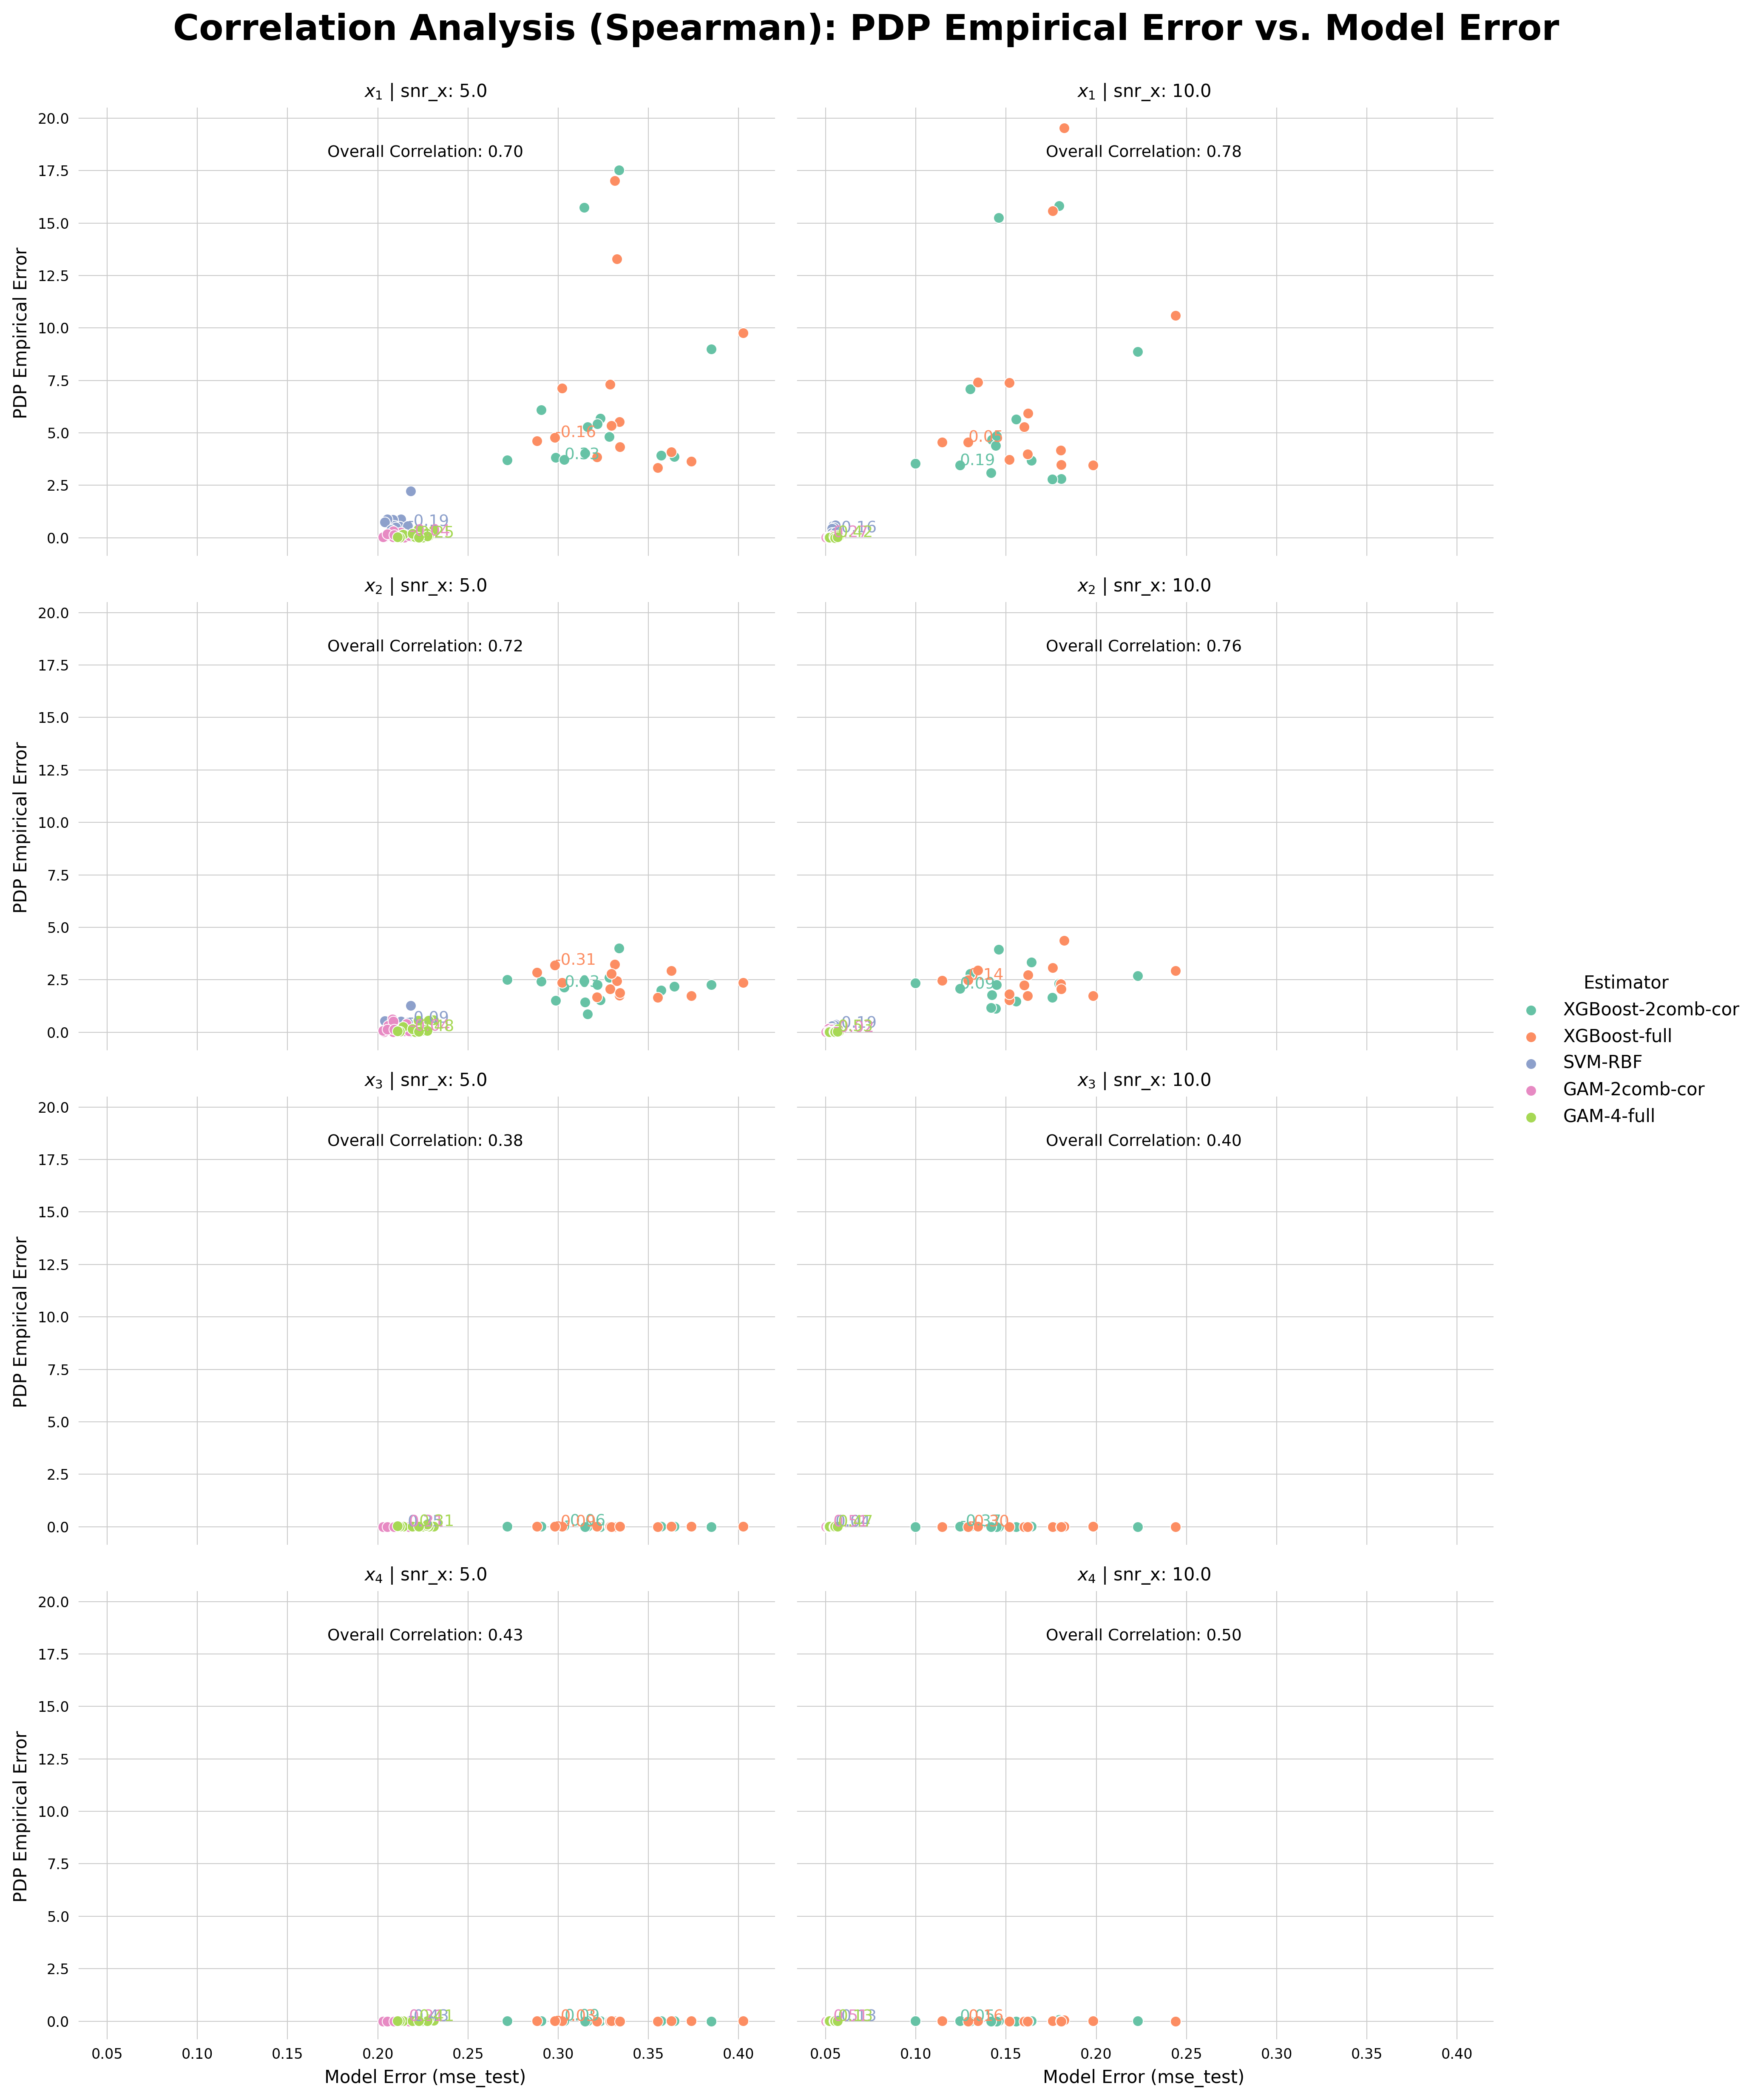

In [8]:
models = df_melted["model_x"].unique().tolist()

g, df_corr = plot_correlation_analysis(
    df_melted,
    models,
    model_error_metric="mse_test",
    feature_effect="PDP Empirical",
    correlation_metric="Spearman",
    overall_correlation=True,
    return_correlation_table=True,
)

In [9]:
g;

In [10]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df_corr.set_index(["feature", "snr", "model"]))

correlation
feature snr  model                         
x_1     5.0  Overall               0.701936
             XGBoost-2comb-cor     0.331868
             XGBoost-full         -0.160440
             SVM-RBF              -0.186813
             GAM-2comb-cor        -0.037363
             GAM-4-full            0.247253
        10.0 Overall               0.775558
             XGBoost-2comb-cor     0.186813
             XGBoost-full          0.054945
             SVM-RBF              -0.156044
             GAM-2comb-cor         0.274725
             GAM-4-full            0.419780
x_2     5.0  Overall               0.718122
             XGBoost-2comb-cor     0.028571
             XGBoost-full         -0.305495
             SVM-RBF              -0.090110
             GAM-2comb-cor        -0.041758
             GAM-4-full            0.478022
        10.0 Overall               0.756347
             XGBoost-2comb-cor     0.090110
             XGBoost-full          0.138462
             SVM-RBF              -0.191209
             GAM-2comb-cor        -0.019780
             GAM-4-full            0.525275
x_3     5.0  Overall               0.376690
             XGBoost-2comb-cor    -0.059341
             XGBoost-full         -0.090110
             SVM-RBF               0.353846
             GAM-2comb-cor         0.208791
             GAM-4-full            0.313187
        10.0 Overall               0.400822
             XGBoost-2comb-cor    -0.367033
             XGBoost-full         -0.296703
             SVM-RBF               0.041758
             GAM-2comb-cor         0.512088
             GAM-4-full            0.468132
x_4     5.0  Overall               0.434088
             XGBoost-2comb-cor     0.090110
             XGBoost-full         -0.028571
             SVM-RBF              -0.428571
             GAM-2comb-cor         0.208791
             GAM-4-full            0.412088
        10.0 Overall               0.503386
             XGBoost-2comb-cor     0.050549
             XGBoost-full          0.160440
             SVM-RBF              -0.134066
             GAM-2comb-cor         0.512088
             GAM-4-full            0.125275

## Feature Effect Results

In [11]:
feauture_effect_type = "ale_results"

In [12]:
effects_results_storage = config.get("storage", "effects_results")
df_effect_res = pd.read_sql_table(feauture_effect_type, f"sqlite:///..{effects_results_storage}")
df_effect_res.head()

,index,model_id,model,simulation,n_train,snr,metric,x_1,x_2,x_3,x_4
0,0,XGBoost-2comb-cor_1_1000_10,XGBoost-2comb-cor,1,1000,10.0,mean_squared_error,0.019258,0.435218,0.002341,0.005454
1,0,XGBoost-full_1_1000_10,XGBoost-full,1,1000,10.0,mean_squared_error,0.058409,0.594160,0.037520,0.019776
2,0,SVM-RBF_1_1000_10,SVM-RBF,1,1000,10.0,mean_squared_error,0.002655,0.001265,0.000284,0.000152
3,0,GAM-2comb-cor_1_1000_10,GAM-2comb-cor,1,1000,10.0,mean_squared_error,0.001567,0.001622,0.000000,0.000000
4,0,GAM-4-full_1_1000_10,GAM-4-full,1,1000,10.0,mean_squared_error,0.001677,0.000841,0.000858,0.001340


## Correlation Analysis

In [13]:
df_melted = create_joined_melted_df(df_model_res, df_effect_res, value_vars=["x_1", "x_2", "x_3", "x_4"])
df_melted.head()

,model_id,model_x,simulation_x,n_train_x,snr_x,mse_train,mse_test,mae_train,mae_test,r2_train,r2_test,feature,effect_error
0,XGBoost-2comb-cor_1_1000_10,XGBoost-2comb-cor,1,1000,10.0,0.079481,0.179353,0.114556,0.249165,0.986319,0.965759,x_1,0.019258
1,XGBoost-full_1_1000_10,XGBoost-full,1,1000,10.0,0.017879,0.182280,0.099350,0.266170,0.996923,0.965200,x_1,0.058409
2,SVM-RBF_1_1000_10,SVM-RBF,1,1000,10.0,0.048364,0.054282,0.174470,0.185616,0.991675,0.989637,x_1,0.002655
3,GAM-2comb-cor_1_1000_10,GAM-2comb-cor,1,1000,10.0,0.048879,0.052544,0.175903,0.183005,0.991587,0.989969,x_1,0.001567
4,GAM-4-full_1_1000_10,GAM-4-full,1,1000,10.0,0.044333,0.056250,0.167913,0.189171,0.992369,0.989261,x_1,0.001677


c:\Users\ti-he\OneDrive\Dokumente\Projekte\feature-effect-empirical-analysis\.venv\Lib\site-packages\scipy\stats\_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


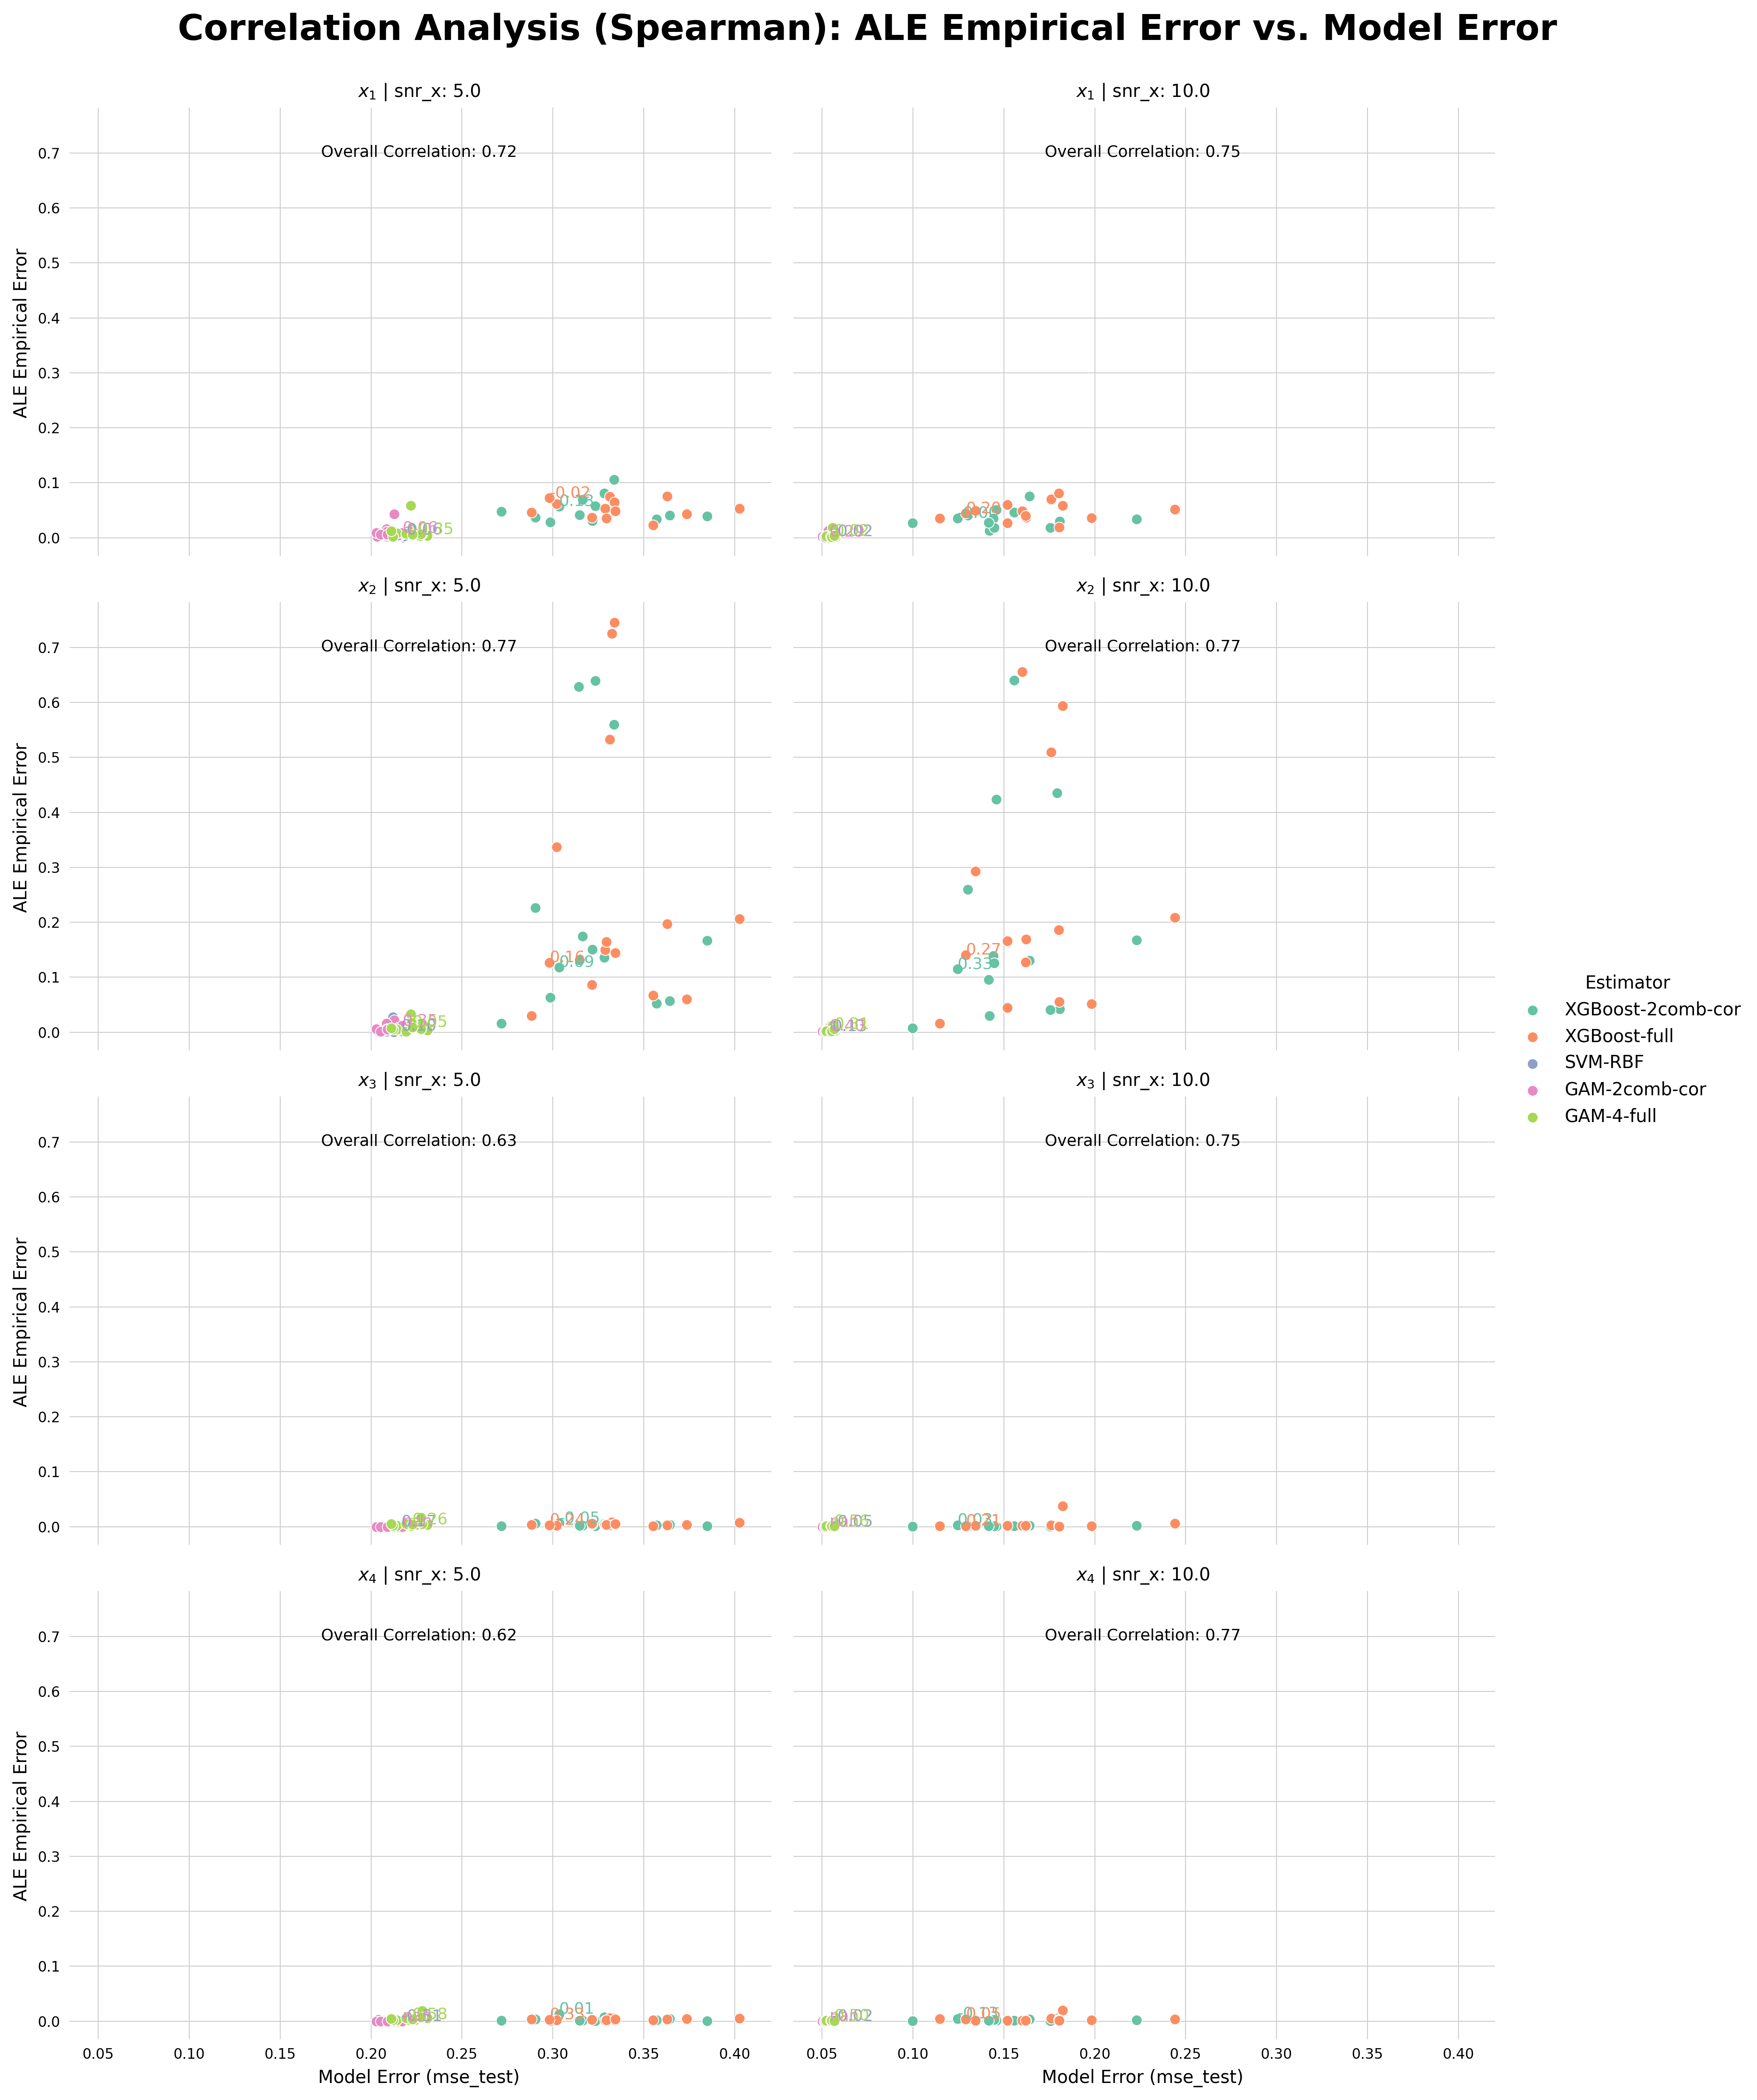

In [14]:
models = df_melted["model_x"].unique().tolist()

g, df_corr = plot_correlation_analysis(
    df_melted,
    models,
    model_error_metric="mse_test",
    feature_effect="ALE Empirical",
    correlation_metric="Spearman",
    overall_correlation=True,
    return_correlation_table=True,
)

In [15]:
g;

In [16]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df_corr.set_index(["feature", "snr", "model"]))

correlation
feature snr  model                         
x_1     5.0  Overall               0.723274
             XGBoost-2comb-cor     0.134066
             XGBoost-full         -0.019780
             SVM-RBF              -0.059341
             GAM-2comb-cor         0.059341
             GAM-4-full           -0.346154
        10.0 Overall               0.752498
             XGBoost-2comb-cor    -0.002198
             XGBoost-full          0.204396
             SVM-RBF              -0.024176
             GAM-2comb-cor         0.287912
             GAM-4-full            0.015385
x_2     5.0  Overall               0.773657
             XGBoost-2comb-cor     0.085714
             XGBoost-full          0.160440
             SVM-RBF               0.103297
             GAM-2comb-cor         0.353846
             GAM-4-full            0.049451
        10.0 Overall               0.767754
             XGBoost-2comb-cor     0.327473
             XGBoost-full          0.270330
             SVM-RBF               0.125275
             GAM-2comb-cor         0.402198
             GAM-4-full            0.309890
x_3     5.0  Overall               0.625789
             XGBoost-2comb-cor    -0.046154
             XGBoost-full          0.243956
             SVM-RBF               0.169231
             GAM-2comb-cor              NaN
             GAM-4-full            0.258242
        10.0 Overall               0.754070
             XGBoost-2comb-cor     0.028571
             XGBoost-full          0.208791
             SVM-RBF              -0.046154
             GAM-2comb-cor              NaN
             GAM-4-full            0.564835
x_4     5.0  Overall               0.618377
             XGBoost-2comb-cor     0.010989
             XGBoost-full          0.331868
             SVM-RBF              -0.305495
             GAM-2comb-cor              NaN
             GAM-4-full            0.576923
        10.0 Overall               0.772445
             XGBoost-2comb-cor    -0.125275
             XGBoost-full          0.050549
             SVM-RBF              -0.024176
             GAM-2comb-cor              NaN
             GAM-4-full            0.498901